### Introduction

In this example, it is used 2 classes dataset, and It is classified with K-nn. This data sets consists of 8 features; several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, Glucose level, BloodPressure, SkinThickness, Diabetes Pedigree Function , and age. Eight features were measured from each sample. It is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

-  The data set consists of 768 observations. 



- pregnant ------------	Number of times pregnant

- glucose --------------	Plasma glucose concentration (glucose tolerance test)

- pressure ------------	Diastolic blood pressure (mm Hg)

- triceps -------------	Triceps skin fold thickness (mm)

- insulin-------------	2-Hour serum insulin (mu U/ml)

- mass----------------	Body mass index (weight in kg/(height in m)\^2)

- pedigree------------	Diabetes pedigree function

- Age-------------------- age(years)

- outcome------------ 	Class variable (test for diabetes)

#### Several constraints were placed on the selection of these instances from a larger database:

- All patients are female
- All patients are at least 21 years old
- All patients are of Pima Indian heritage

### Objective

I want to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

The objective of this analysis is to diagnostically predict if a patient has or likely to have diabetes based on certain diagnostic measurements included in this dataset.

Knn is A simple but powerful approach for making predictions is to use the most similar historical examples to the new data. This is the principle behind the k-Nearest Neighbors algorithm.

The entire training dataset is stored. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made.

Similarity between records can be measured many different ways. A problem or data-specific method can be used. Generally, a good starting point is the Euclidean distance.

Once the neighbors are discovered, the summary prediction can be made by returning the most common outcome or taking the average. As such, KNN can be used for classification or regression problems.

There is no model to speak of other than holding the entire training dataset. Because no work is done until a prediction is required, KNN is often referred to as a lazy learning method.

### Prediction Analysis

A predictive model was created with outcomes having diabetes being Y and X being the features of Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, and Age. The problem is considered a classification problem, as we are trying to determine if a patient will or will not have diabetes based on their health metrics.
The algorithm chosen for this analysis will be the K-NN, which will be implemented by 3 different method for distance calculations. 


In [945]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Loading the dataset

df=pd.read_csv("/Users/azadeh/Desktop/DiabetsDataSet/diabetes.csv")

print(df.columns)

print("  ")
print("*****************************************************************************")
print("*****************************************************************************")

print("Data set shape:")
print(df.shape)

print("  ")
print("*****************************************************************************")
print("*****************************************************************************")

df.dtypes.value_counts()
print(df.dtypes)

print("  ")
print("*****************************************************************************")
print("*****************************************************************************")


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
  
*****************************************************************************
*****************************************************************************
Data set shape:
(768, 9)
  
*****************************************************************************
*****************************************************************************
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
  
*****************************************************************************
*****************************************************************************

In [946]:
# gives information about the data types,columns, null value counts, memory usage for all the features
df.info()
print("  ")
print("*****************************************************************************")
print("*****************************************************************************")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
  
*****************************************************************************
*****************************************************************************


###  Data Analysis and Preparation-1

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

In [947]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [948]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###  Data Analysis and Preparation-2


For further analysis we will treat these 0s as missing values and based on the distribution of the results will replace them with either mean or median of the measurements.



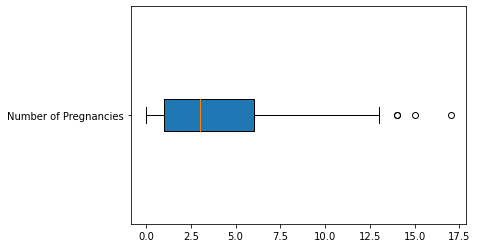

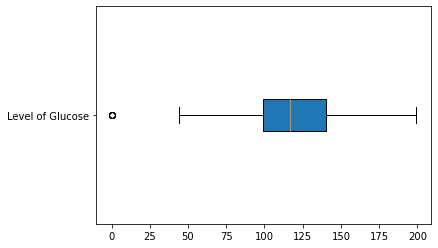

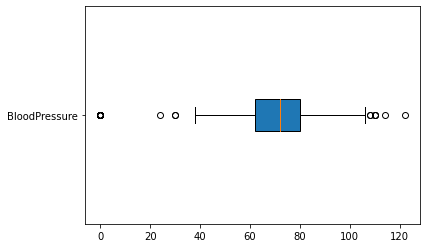

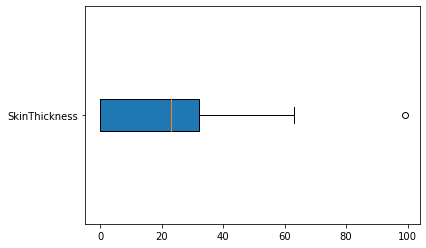

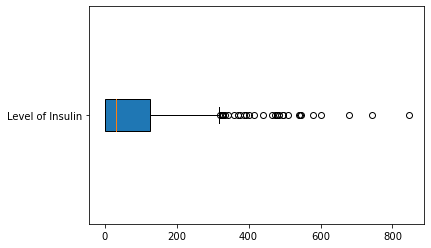

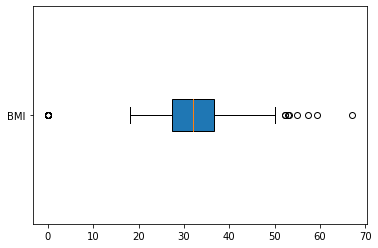

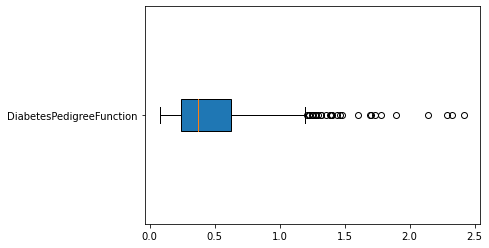

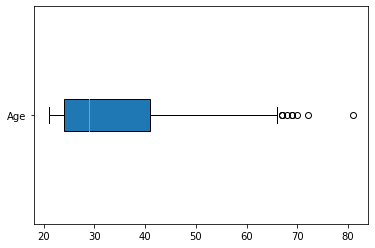

In [949]:
import matplotlib.pyplot as plt

plt.boxplot(df.Pregnancies, patch_artist = True,vert = 0, labels=['Number of Pregnancies'])
plt.show()

plt.boxplot(df.Glucose, patch_artist = True,vert = 0, labels=['Level of Glucose'])
plt.show()

plt.boxplot(df.BloodPressure, patch_artist = True,vert = 0, labels=['BloodPressure'])
plt.show()

plt.boxplot(df.SkinThickness, patch_artist = True,vert = 0, labels=['SkinThickness'])
plt.show()

plt.boxplot(df.Insulin, patch_artist = True,vert = 0, labels=['Level of Insulin'])
plt.show()

plt.boxplot(df.BMI, patch_artist = True,vert = 0, labels=['BMI'])
plt.show()

plt.boxplot(df.DiabetesPedigreeFunction, patch_artist = True,vert = 0, labels=['DiabetesPedigreeFunction'])
plt.show()


plt.boxplot(df.Age, patch_artist = True,vert = 0, labels=['Age'])
plt.show()


<AxesSubplot:>

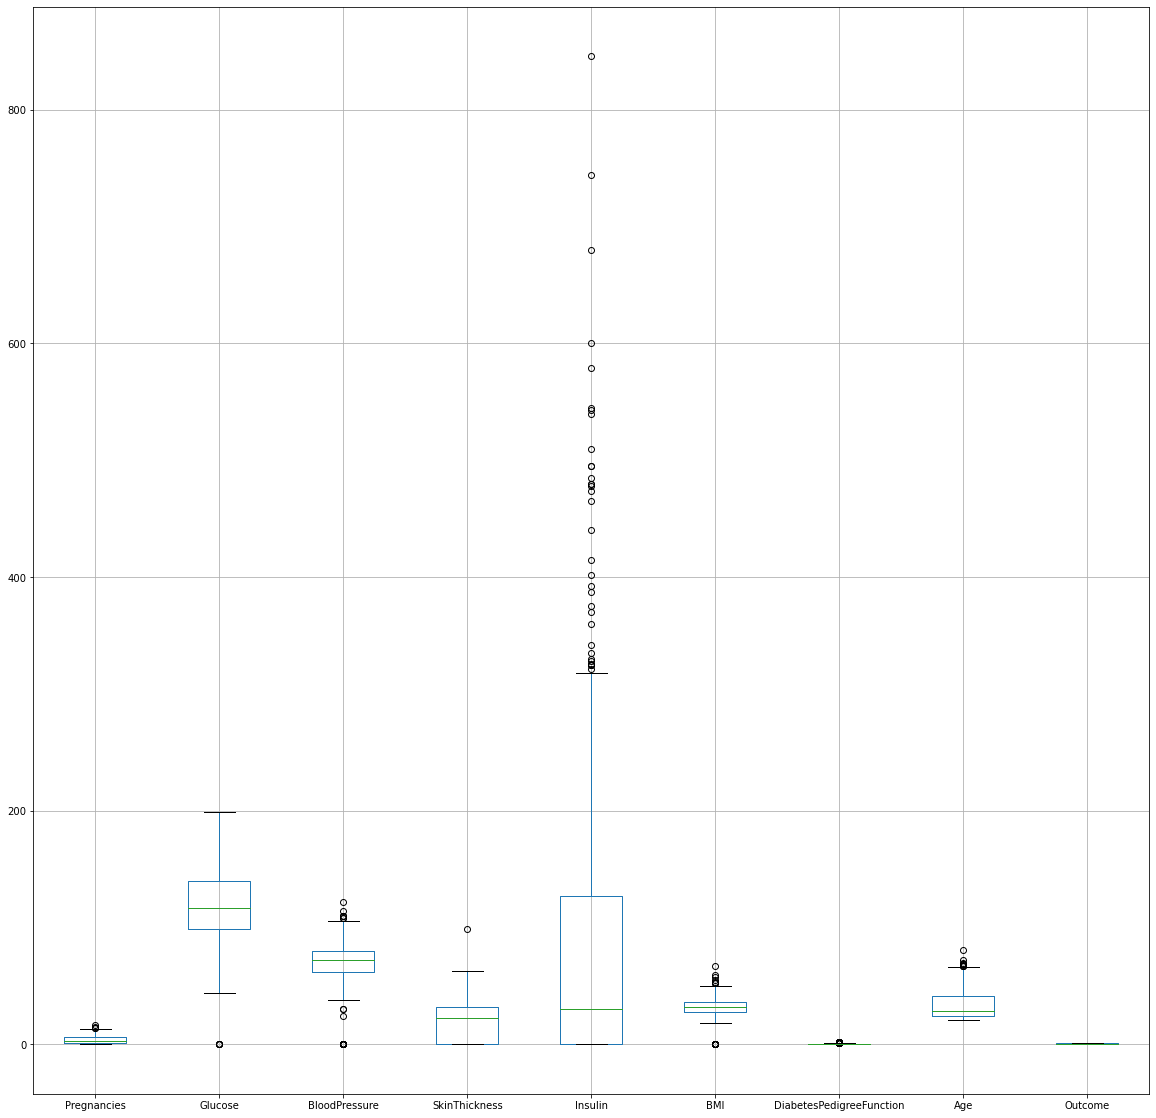

In [950]:
df.boxplot(figsize = (20,20))

### box plot Analysis
- The glucose box plot shows the maximum, minimum and range of the glucose with extreme values. Since there is only one outlier, 0s will be replaced with the mean value.


- The blood pressure box plot shows the maximum, minimum and range of the blood pressure with extreme values. There are not many extreme values, hence the 0s will be replaced with the mean value.


- The insulin box plot has numerous outliers, therefore, 0s will be replaced with the mean for more accurate results.


- The BMI box plot has a range from 20 to 50. However, it has a large number of outliers, therefore, 0s will be replaced with the mean for more accurate results.


- The SkinThickness box plot shows that it has an overwhelming number of 0s, therefore, 0s will be replaced by mean.


----------------------------------------------------------------------

### Missing Values

More about data:
    
Although in this dataset none of the columns contain missing values, some of the measurements have values of 0, which is not possible for a living human organism. 

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.

### Descriptive Statistics

First of all:
The histogram on the diagonal allows us to see the distribution of a single variable.

The histogram chart illustrates the distribution of data for the different columns of the dataset.
These charts give information about the independent variables and dependent variables. The independent variable of the histogram charts include the number of pregnancies, BMI, insulin level, age, blood pressure, diabetes pedigree function, skin thickness and glucose, whereas the dependent variable histogram chart includes the outcome.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

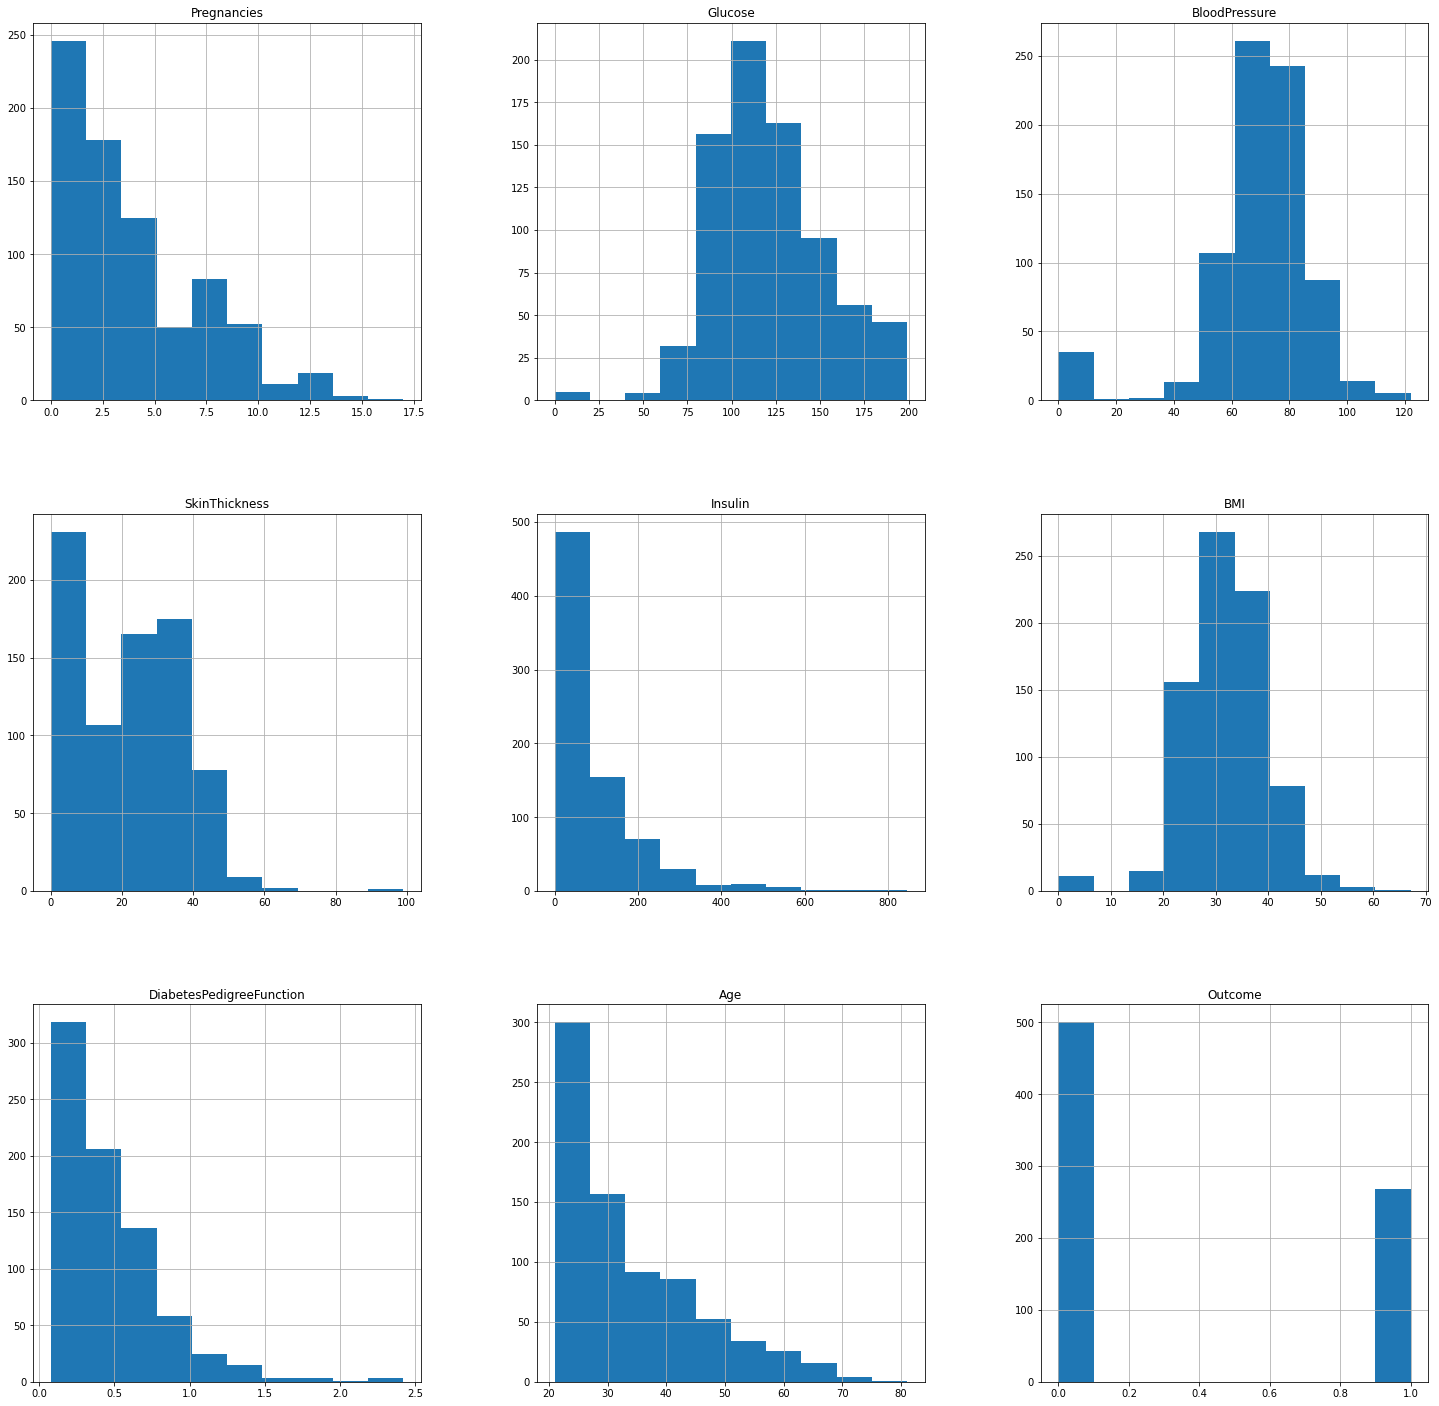

In [951]:
df.hist(figsize = (25,25))

In [952]:
print(df.isnull().sum())
print("********************************************************")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
********************************************************


### Replacing Missing Values


I replace zeros with the mean for these 5 features: Blood Pressure, BMI, Insulin level, skin thickness and glucose.

In [953]:
df.loc[df["BloodPressure"]==0]
df.loc[df["BloodPressure"]==0,"BloodPressure"]=np.nan
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)

df.loc[df["Insulin"]==0]
df.loc[df["Insulin"]==0,"Insulin"]=np.nan
df["Insulin"].fillna(df["Insulin"].mean(), inplace=True)

df.loc[df["SkinThickness"]==0]
df.loc[df["SkinThickness"]==0,"SkinThickness"]=np.nan
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace=True)


df.loc[df["Glucose"]==0]
df.loc[df["Glucose"]==0,"Glucose"]=np.nan
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)

df.loc[df["BMI"]==0]
df.loc[df["BMI"]==0,"BMI"]=np.nan
df["BMI"].fillna(df["BMI"].mean(), inplace=True)

In [954]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [955]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


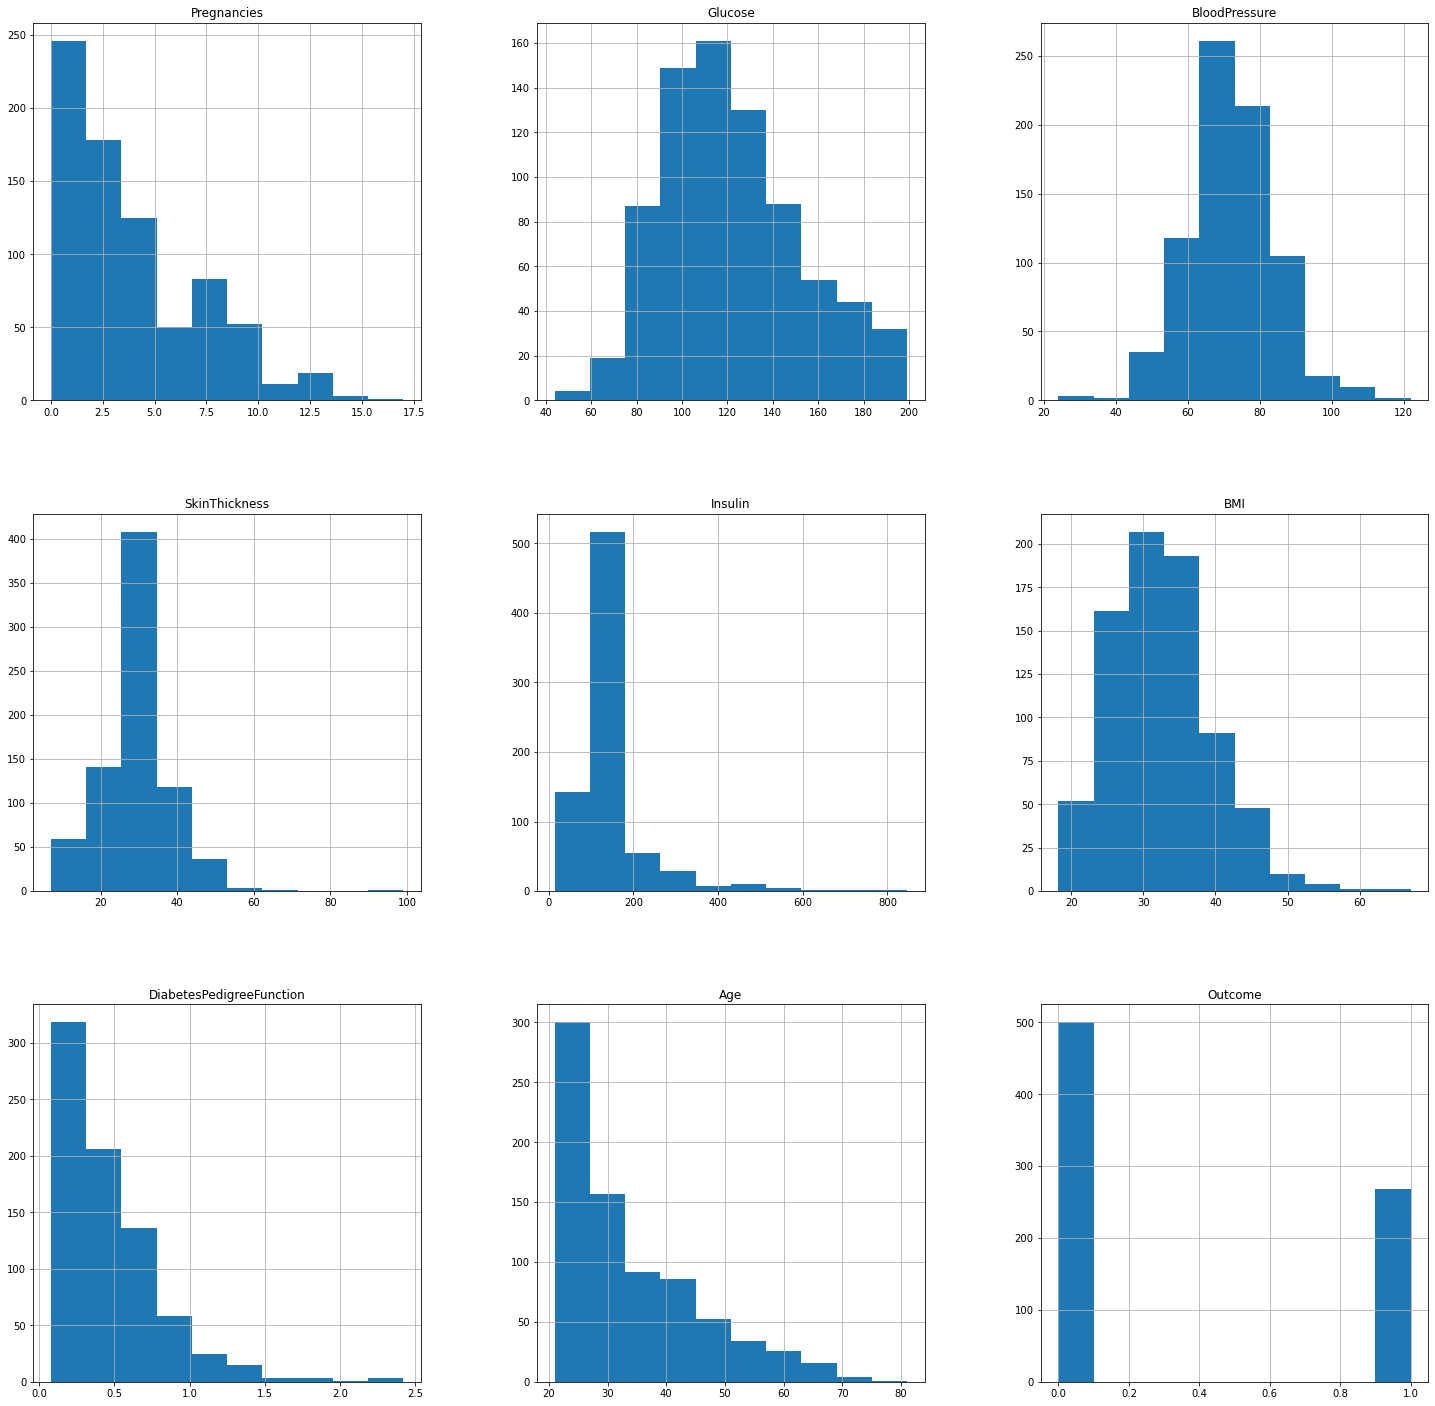

In [956]:
b = df.hist(figsize = (25,25))

### outcome graph
The below graph shows that the number of non-diabetics is almost twice the number of diabetic patients. It means we have unbalanced dataset.

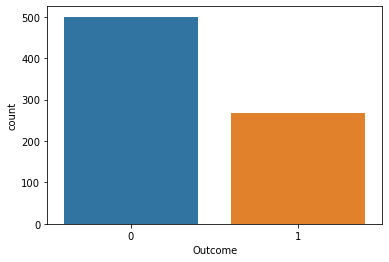

In [957]:
sns.countplot(x='Outcome',data=df)
plt.show()

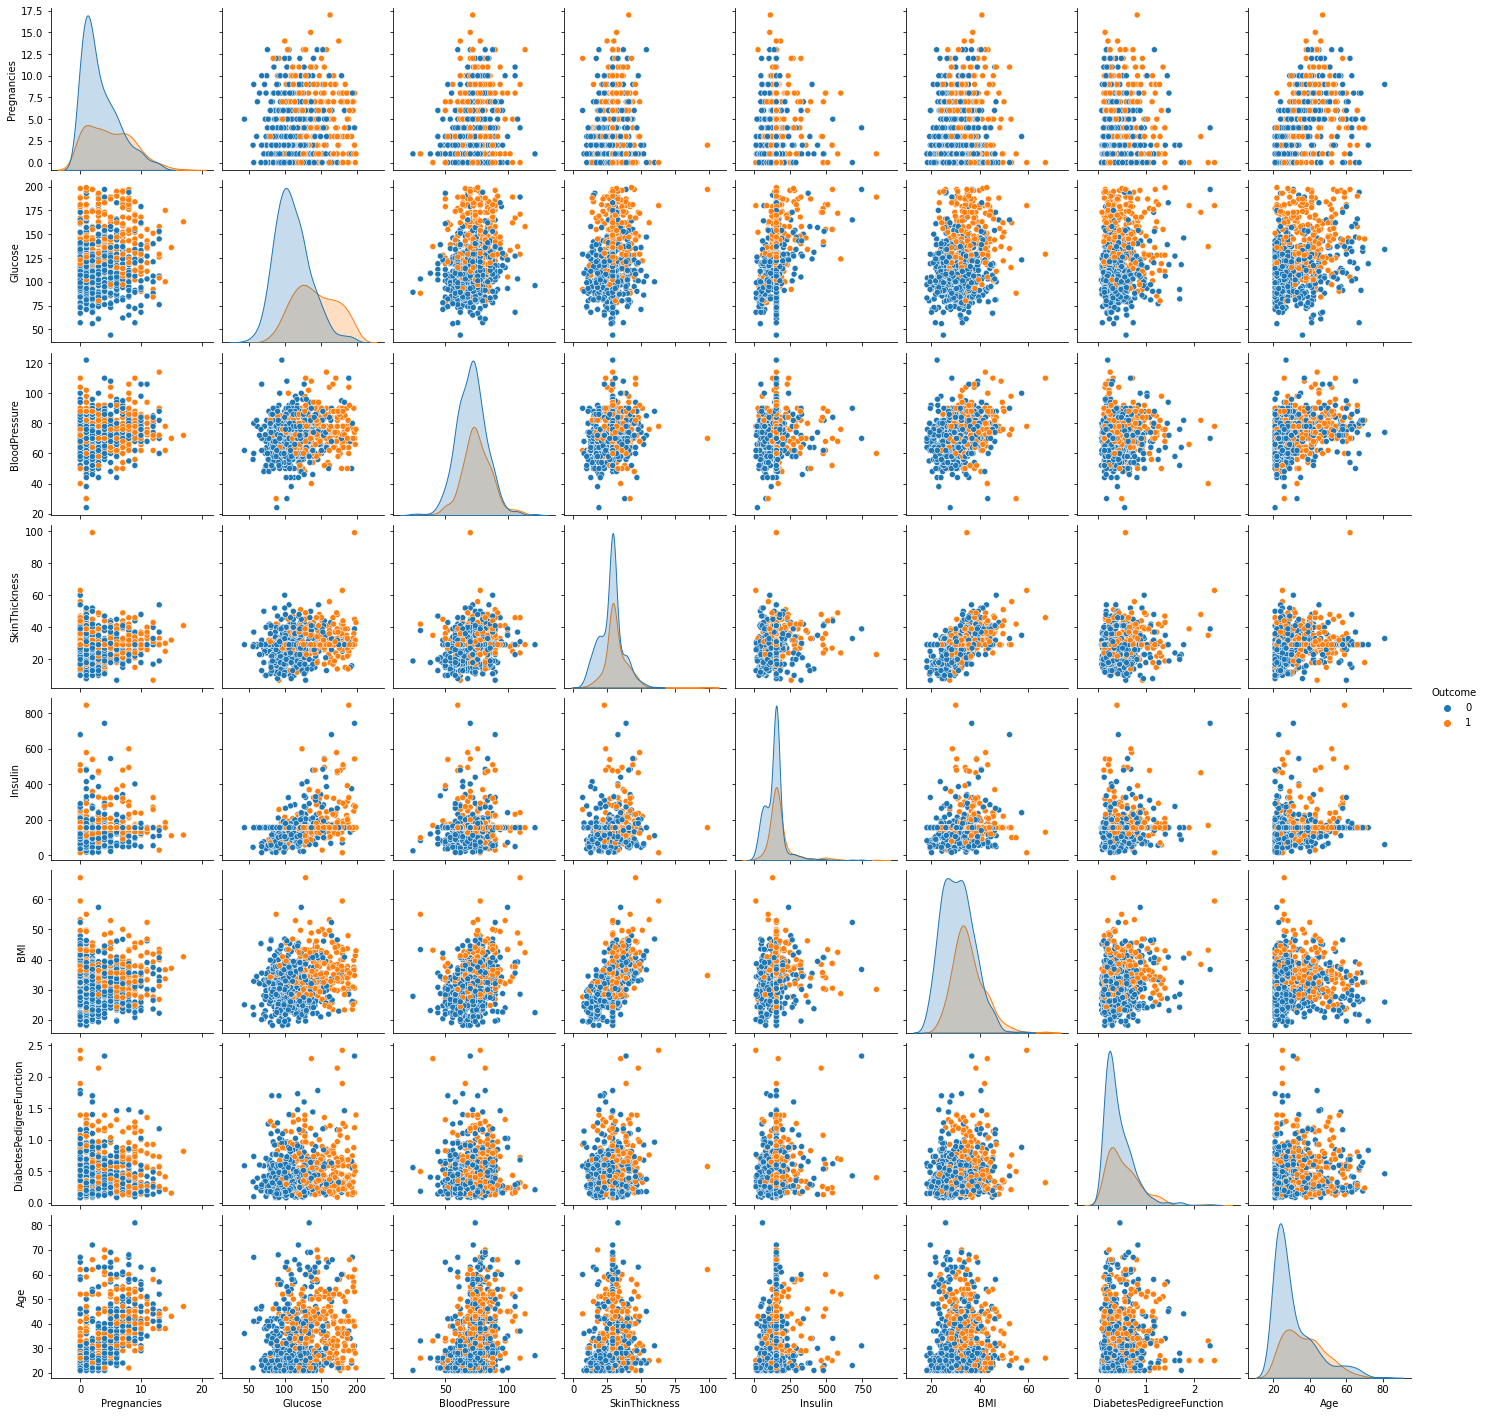

In [958]:
c=sns.pairplot(df, hue = 'Outcome')

### Exploratory Analysis

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

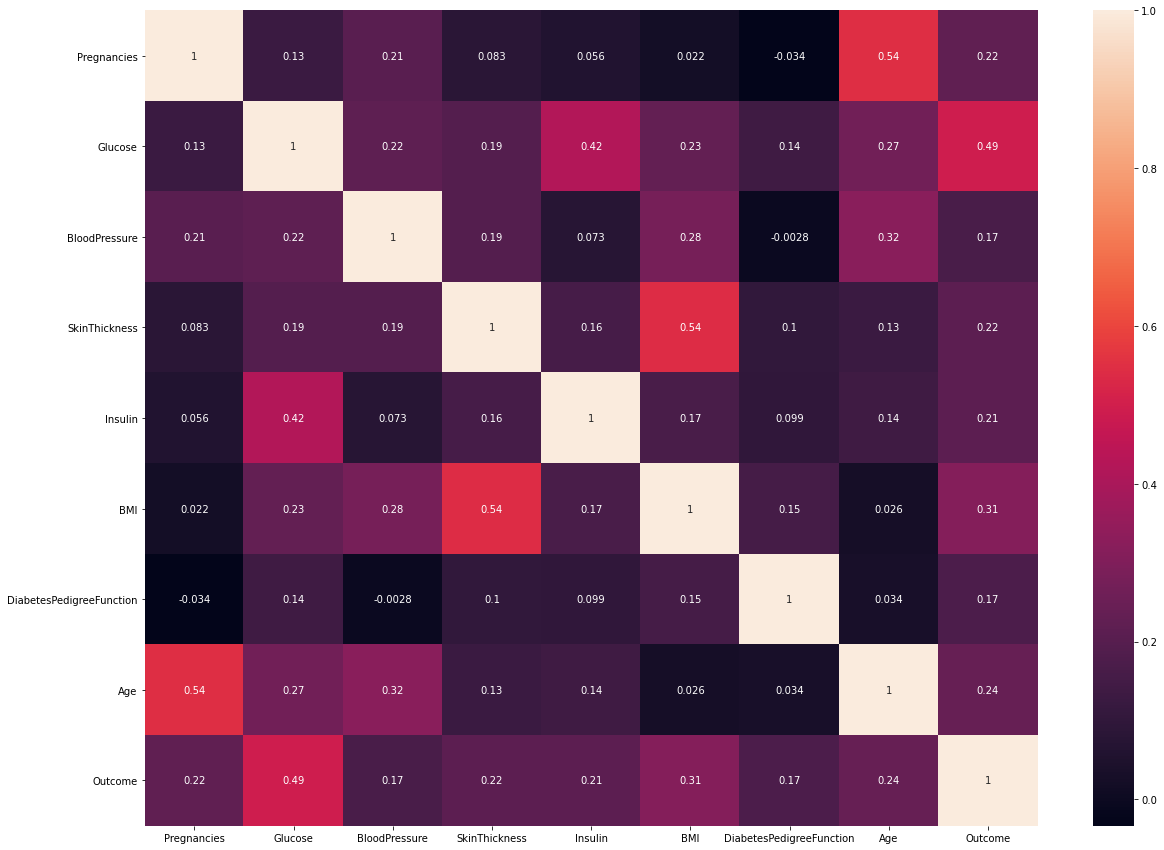

In [959]:
plt.figure(figsize=(20,15))  
sns.heatmap(df.corr(),annot=True)

### Scaling the data

It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN. It is obvious that high difference range between features can have bad effec on our model and impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.


I use a sklearn method for scaling; It is StandardScaler.

In [960]:
#scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [961]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


### Train/test split

Split the dataset into two pieces: a training set and a testing set.


Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

Test Train Split and Cross Validation methods:

test_size=0.2
- 20% of observations to test set = 154 samples
- 80% of observations to training set = 614 observations
I use random_state hyperparameter, random_state=21.


In [962]:
y = np.array(df.iloc[:,-1])
#print(X)
#print(y)

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2,random_state = 21)
X_train.shape
y_train=y_train.reshape(614,1)
y_train.shape
train =np.concatenate((X_train,y_train),axis=1)
test =np.concatenate((X_test,y_test.reshape(X_test.shape[0],1)),axis=1)


In [963]:
start = time.time()


from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction


In [964]:
YY=[]
for i in range(len(test)):
    YY.append((int(predict_classification(train, test[i],11)), y_test[i]))


print(YY)

end = time.time()

print("***************************************************************************")

print(f"Runtime of the program is {end - start}")

[(0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0),

In [965]:
# positive : 1 = diabetes 
# negative : 0 = no diabetes 
false_negative = 0
false_positive = 0
true_positive = 0
true_negative = 0
for i in range(len(test)):
    tup = YY[i]
    if tup[0] == 0 : # predicted to be in negative
        if tup[1] == 0 : 
            true_negative+=1
        else: 
            false_negative+=1
    else: # predicted to be in positive
        if tup[1] == 0 :  
            false_positive += 1
        else: 
            true_positive += 1
print("true_negative: "+ str(true_negative))
print("false_negative: "+ str(false_negative))
print("false_positive: "+ str(false_positive))
print("true_positive: "+ str(true_positive))

true_negative: 87
false_negative: 30
false_positive: 7
true_positive: 30


### Model

I have tested with different value of K(1,2,3,4,5,7,9,11,13) and in every step I changed the 5 mentioned features which have zero value or not respectively, the best result was regarding to K=11 when I replaced all zero value for 5 mentioned features with their mean value.(Glucose, BloodPressure, SkinThickness, Insulin and BMI).    

______________________________

### Model Performance Analysis

1. Confusion Matrix:
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

2. Classification Report
Report which includes Accuracy, Precision, Recall and F1-Score.

In [966]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
predict=[]
for i in range(len(test)):
    pred=np.array([int(predict_classification(train, test[i],11))])
    predict.append(pred[0])
predict=np.array(predict)
#print(predict)
#print(y_test)

cm = metrics.confusion_matrix(y_test, predict)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[87  7]
 [30 30]]


### Accuracy: 0.7597

The accuracy shows describing the number of correct predictions over all predictions which is almost %76. It means almost 76 correct predictions out of 100 total examples. This tells us that for the 164 observations used in the model, the model correctly predicted whether or not somebody churned %76 of the time.
While accuracy alone doesn't tell the full story, there is a significant disparity between the number of positive and negative labels and in this kind of problem the Accuracy is not a completely good measure because we have quite unbalanced datasets.

In [967]:
acc= (true_positive+true_negative)/ (true_negative+false_negative+false_positive+true_positive)
print("accuracy: " + str(acc))

accuracy: 0.7597402597402597


### Precision: 0.81
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

In [968]:
Precision=(true_positive)/ (false_positive+true_positive)
print("Precision: " + str(Precision))

Precision: 0.8108108108108109


### Recall (Sensitivity): 0.5
Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

In [969]:
Recall=(true_positive)/ (false_negative+true_positive)
print("Recall: " + str(Recall))

Recall: 0.5


### F1 score: 0.61
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

In [970]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print("F1-score: " + str(F1))

F1-score: 0.6185567010309277


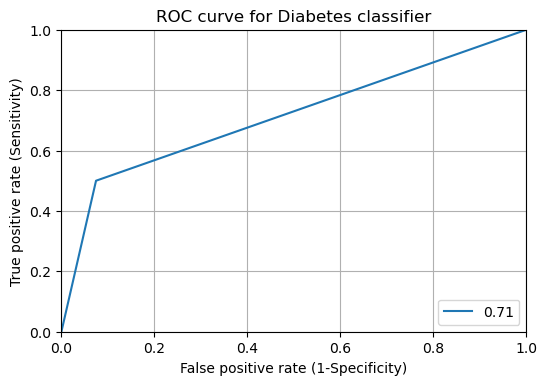

In [971]:
import sklearn

from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test, predict))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

### Distance calculation with Manhattan method

In second part I calculated with manhattan method :

There is not really huge difference between these two method in the result.

In [972]:
start = time.time()


from math import sqrt

# calculate the Manhattan distance between two vectors
def Manhattan_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += abs(row1[i] - row2[i])
    return (distance)

 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = Manhattan_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction



In [973]:
YY=[]
for i in range(len(test)):
    YY.append((int(predict_classification(train, test[i],11)), y_test[i]))


print(YY)

end = time.time()

print("***************************************************************************")

print(f"Runtime of the program is {end - start}")

[(0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0),

In [974]:
# positive : 1 = diabetes 
# negative : 0 = no diabetes 
false_negative = 0
false_positive = 0
true_positive = 0
true_negative = 0
for i in range(len(test)):
    tup = YY[i]
    if tup[0] == 0 : # predicted to be in negative
        if tup[1] == 0 : 
            true_negative+=1
        else: 
            false_negative+=1
    else: # predicted to be in positive
        if tup[1] == 0 :  
            false_positive += 1
        else: 
            true_positive += 1
print("true_negative: "+ str(true_negative))
print("false_negative: "+ str(false_negative))
print("false_positive: "+ str(false_positive))
print("true_positive: "+ str(true_positive))

true_negative: 86
false_negative: 29
false_positive: 8
true_positive: 31


In [975]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
predict=[]
for i in range(len(test)):
    pred=np.array([int(predict_classification(train, test[i],11))])
    predict.append(pred[0])
predict=np.array(predict)
#print(predict)
#print(y_test)

cm = metrics.confusion_matrix(y_test, predict)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[86  8]
 [29 31]]


In [976]:
acc= (true_positive+true_negative)/ (true_negative+false_negative+false_positive+true_positive)
print("accuracy: " + str(acc))

accuracy: 0.7597402597402597


In [977]:
Precision=(true_positive)/ (false_positive+true_positive)
print("Precision: " + str(Precision))

Precision: 0.7948717948717948


In [978]:
Recall=(true_positive)/ (false_negative+true_positive)
print("Recall: " + str(Recall))

Recall: 0.5166666666666667


In [979]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print("F1-score: " + str(F1))

F1-score: 0.6262626262626263


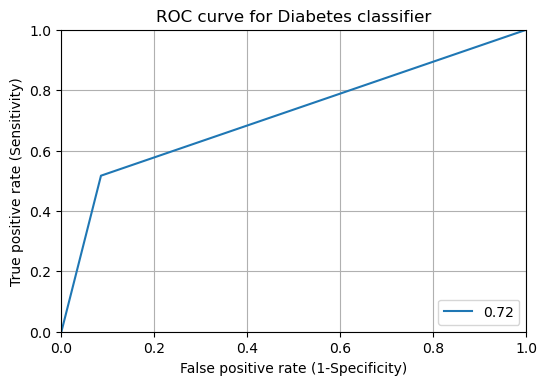

In [980]:
import sklearn

from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test, predict))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

***********************
### Distance calculation with Cosine method


In third part I calculated distance with Cosine method :

There is a really huge difference between Cosine method withe two previous ones in the result.

In [981]:
start = time.time()


from math import sqrt

# calculate the Cosine distance between two vectors
def cosine_vectorized(row1, row2):
    row2 = row2.reshape(row2.shape[0],1)
    row1 = row1.reshape(row1.shape[0],1)
    
    sumyy = np.linalg.norm(row2) #(row2.**2).sum(1)
    #print("sumyy: " + str(sumyy))
    sumxx = np.linalg.norm(row1)#(row1.**2).sum(1, keepdims=1)
    #print("sumxx: " + str(sumxx))
    sumxy = np.dot(row1.T,row2)#row1.dot(row2.T)
    #print("sumxy: " + str(sumxy))
    return (sumxy/np.sqrt(sumxx))/np.sqrt(sumyy)

 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = cosine_vectorized(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction




In [982]:
YY=[]
for i in range(len(test)):
    YY.append((int(predict_classification(train, test[i],1)), y_test[i]))


print(YY)

end = time.time()

print("***************************************************************************")

print(f"Runtime of the program is {end - start}")

[(0, 1), (1, 0), (1, 0), (0, 1), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 1), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 1), (1, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 0), (0, 1), (1, 0), (0, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 1), (0, 1), (1, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (0, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 1), (0, 1), (0, 1), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (1, 0), (1, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0), (0, 1), (1, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (0, 1), (0, 1), (1, 0), (0, 0), (1, 0),

In [983]:
# positive : 1 = diabetes 
# negative : 0 = no diabetes 
false_negative = 0
false_positive = 0
true_positive = 0
true_negative = 0
for i in range(len(test)):
    tup = YY[i]
    if tup[0] == 0 : # predicted to be in negative
        if tup[1] == 0 : 
            true_negative+=1
        else: 
            false_negative+=1
    else: # predicted to be in positive
        if tup[1] == 0 :  
            false_positive += 1
        else: 
            true_positive += 1
print("true_negative: "+ str(true_negative))
print("false_negative: "+ str(false_negative))
print("false_positive: "+ str(false_positive))
print("true_positive: "+ str(true_positive))

true_negative: 38
false_negative: 52
false_positive: 56
true_positive: 8


In [984]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
predict=[]
for i in range(len(test)):
    pred=np.array([int(predict_classification(train, test[i],11))])
    predict.append(pred[0])
predict=np.array(predict)
#print(predict)
#print(y_test)

cm = metrics.confusion_matrix(y_test, predict)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[37 57]
 [60  0]]


In [985]:
acc= (true_positive+true_negative)/ (true_negative+false_negative+false_positive+true_positive)
print("accuracy: " + str(acc))

accuracy: 0.2987012987012987


In [986]:
Precision=(true_positive)/ (false_positive+true_positive)
print("Precision: " + str(Precision))

Precision: 0.125


In [987]:
Recall=(true_positive)/ (false_negative+true_positive)
print("Recall: " + str(Recall))

Recall: 0.13333333333333333


In [988]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print("F1-score: " + str(F1))

F1-score: 0.12903225806451615


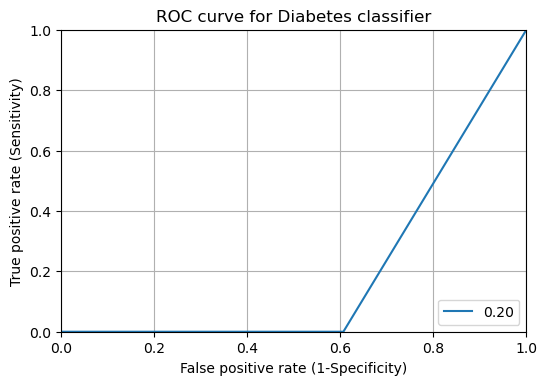

In [989]:
import sklearn

from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test, predict))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

### Conclusions

The dataset on the Pima Indian population of Arizona is one of the most studied datasets on the exploration of the causes and outcomes of Diabetes. According to studies published in this study, it has been deemed that the Pima Indian population was suffering from type 2 diabetes. We conducted data analysis to investigate whether this dataset substantiates the onset of type 2 diabetes.
As stated, prior, the features included in this analysis are age, BMI, insulin, blood pressure, skin thickness, diabetes pedigree, glucose and outcome. Our initial hypothesis was that the outcome of ‘1’ or undergoing diabetes is predominantly caused by the level of glucose, age and genetics. After conducting a K-NN model with 3 different distance calulations method. 

The best result was related to the ECuledean method distance valculation that average of all the accuracy values was approximately 76%. Therefore, we can deduce that this model has a moderate prediction accuracy with regard to the outcome of diabetes. In addition, we also executed a confusion matrix to examine our results. The confusion matrix generated: 87 True Negatives, 30 False Negatives, 7 False Positives and 30 True Positives. It appears that our model had produced more False Negatives than we anticipated.